In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
df=pd.read_csv("dailyActivity_merged.csv")

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
df['Calories'].max()

4900

In [5]:
df['TotalDistance'].max()

28.0300006866455

In [6]:
for col in df.columns:
    print(col,pd.isnull(df[col]).sum())

Id 0
ActivityDate 0
TotalSteps 0
TotalDistance 0
TrackerDistance 0
LoggedActivitiesDistance 0
VeryActiveDistance 0
ModeratelyActiveDistance 0
LightActiveDistance 0
SedentaryActiveDistance 0
VeryActiveMinutes 0
FairlyActiveMinutes 0
LightlyActiveMinutes 0
SedentaryMinutes 0
Calories 0


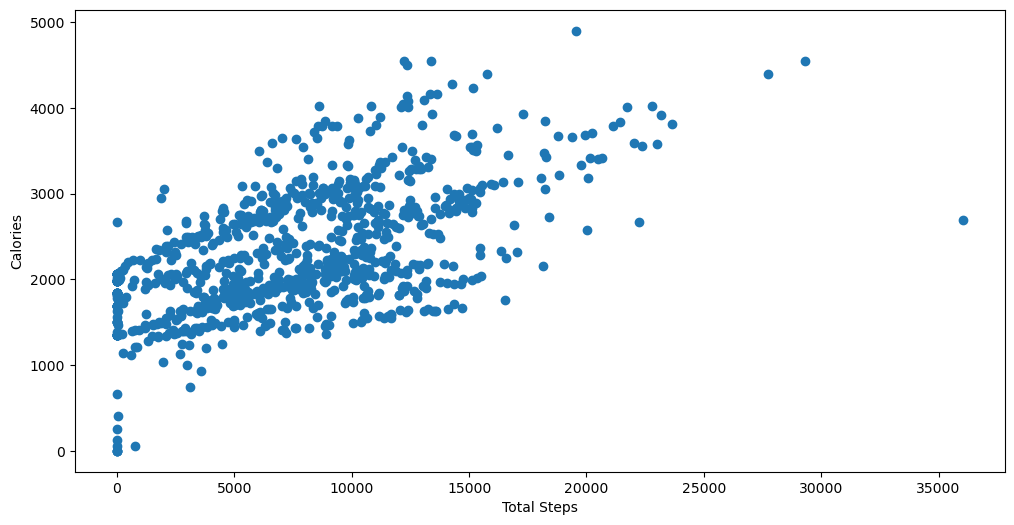

In [7]:
plt.figure(figsize=(12,6))
plt.scatter(df['TotalSteps'],df['Calories'])
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

In [8]:
df['Activity_Level'] = np.where(df['VeryActiveMinutes'] > 30, 'High', 'Low')

In [9]:
df['Activity_Level'].value_counts()

Activity_Level
Low     697
High    243
Name: count, dtype: int64

In [10]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_Level
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Low
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Low
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Low
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Low
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Low
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,High
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Low
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,High


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
X = df[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes']]
y = df['Activity_Level']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.3)

In [14]:
model1=RandomForestClassifier()
model1.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
y_pred=model1.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred)

1.0

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
df['Activity_number']=le.fit_transform(df['Activity_Level'])

In [19]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Activity_Level,Activity_number
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,Low,1
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,Low,1
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Low,1
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,Low,1
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Low,1
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,High,0
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Low,1
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,High,0


In [20]:
X1=df[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'Activity_number']]
y1=df[['Calories']]

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,y1,random_state=42,test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)

C:\Users\saiki\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [24]:
y_pred2=model2.predict(X_test)

In [25]:
mean_absolute_error(Y_test,y_pred2)

318.93912301230824

In [26]:
mean_squared_error(Y_test,y_pred2)

182140.50938022326

In [27]:
y_pred2[1]

2502.83

In [28]:
Y_test[:1]

,Calories
605,2536


In [29]:
joblib.dump(model1,"model1.pkl")

['model1.pkl']

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train.values.ravel())

best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred2)
print("Optimized Mean Squared Error:", mse)


Optimized Mean Squared Error: 179104.94231319378


In [30]:
joblib.dump(model2,"model2.pkl")

['model2.pkl']